In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [3]:
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=1)
    plt.plot(x0, gutter_down, "k--", linewidth=1)


In [4]:
iris = datasets.load_iris()
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
X=iris["data"][:,(2,3)] #length and width of petals
y=(iris["target"] ==2).astype(np.float64) #Iris-Virginica

## Linear Support Vector Machine (SVM) classification

In [6]:
svm_clf = Pipeline([
    ('scaler',StandardScaler()),
    ('linear_svc',LinearSVC(C=1,loss='hinge'))
])

In [7]:
svm_clf.fit(X,y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linear_svc',
                 LinearSVC(C=1, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=None, tol=0.0001,
                           verbose=0))],
         verbose=False)

In [8]:
svm_clf.predict([[5.5,1.7]]) 

array([1.])

Different regularization settings C

In [13]:
scaler = StandardScaler()
svm_clf1 = LinearSVC(C=1, loss="hinge", random_state=42)
svm_clf2 = LinearSVC(C=50, loss="hinge", random_state=42)

scaled_svm_clf1 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf1),
    ])
scaled_svm_clf2 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf2),
    ])

scaled_svm_clf1.fit(X, y)
scaled_svm_clf2.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linear_svc',
                 LinearSVC(C=50, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=42, tol=0.0001,
                           verbose=0))],
         verbose=False)

In [14]:
# Convert to unscaled parameters
b1 = svm_clf1.decision_function([-scaler.mean_ / scaler.scale_])
b2 = svm_clf2.decision_function([-scaler.mean_ / scaler.scale_])
w1 = svm_clf1.coef_[0] / scaler.scale_
w2 = svm_clf2.coef_[0] / scaler.scale_
svm_clf1.intercept_ = np.array([b1])
svm_clf2.intercept_ = np.array([b2])
svm_clf1.coef_ = np.array([w1])
svm_clf2.coef_ = np.array([w2])

In [15]:
# Find support vectors (LinearSVC does not do this automatically)
t = y * 2 - 1
support_vectors_idx1 = (t * (X.dot(w1) + b1) < 1).ravel()
support_vectors_idx2 = (t * (X.dot(w2) + b2) < 1).ravel()
svm_clf1.support_vectors_ = X[support_vectors_idx1]
svm_clf2.support_vectors_ = X[support_vectors_idx2]

[4, 6, 0.8, 2.8]

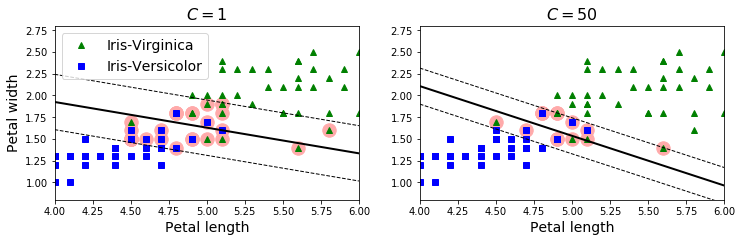

In [16]:
plt.figure(figsize=(12,3.2))
plt.subplot(121)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^", label="Iris-Virginica")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs", label="Iris-Versicolor")
plot_svc_decision_boundary(svm_clf1, 4, 6)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.title("$C = {}$".format(svm_clf1.C), fontsize=16)
plt.axis([4, 6, 0.8, 2.8])

plt.subplot(122)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
plot_svc_decision_boundary(svm_clf2, 4, 6)
plt.xlabel("Petal length", fontsize=14)
plt.title("$C = {}$".format(svm_clf2.C), fontsize=16)
plt.axis([4, 6, 0.8, 2.8])

## Nonlinear SVM Classification

Text(0, 0.5, '$x_2$')

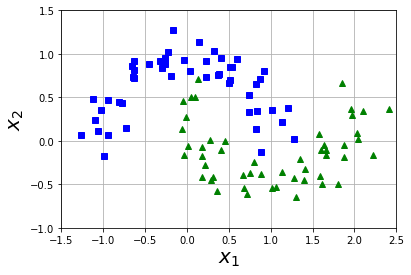

In [17]:
X,y=datasets.make_moons(noise=0.15,random_state=42)
plt.plot(X[:,0][y==0],X[:,1][y==0],"bs")
plt.plot(X[:,0][y==1],X[:,1][y==1],"g^")
plt.axis([-1.5,2.5,-1,1.5])
plt.grid()
plt.xlabel(r"$x_1$",fontsize=20)
plt.ylabel(r"$x_2$",fontsize=20)

In [18]:
from sklearn.preprocessing import PolynomialFeatures

In [19]:
polynomial_svm_clf = Pipeline([
    ('poly_features',PolynomialFeatures(degree=3)),
    ('scaler',StandardScaler()),
    ('svm_clf',LinearSVC(C=10,loss="hinge")),
])
polynomial_svm_clf.fit(X,y)

/Users/hugo/Software/miniconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Pipeline(memory=None,
         steps=[('poly_features',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 LinearSVC(C=10, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=None, tol=0.0001,
                           verbose=0))],
         verbose=False)

Text(0, 0.5, '$x_2$')

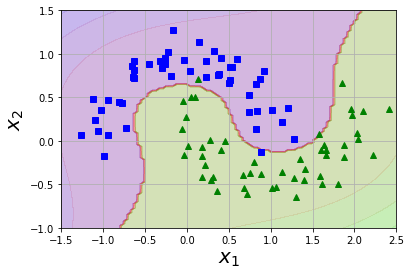

In [20]:
x0s = np.linspace(-1.5,2.5,100)
x1s = np.linspace(-1.,1.5,100)
x0,x1 = np.meshgrid(x0s,x1s)
X_new = np.c_[x0.ravel(),x1.ravel()]
y_pred = polynomial_svm_clf.predict(X_new).reshape(x0.shape)
y_decision = polynomial_svm_clf.decision_function(X_new).reshape(x0.shape)
plt.contourf(x0,x1,y_pred,cmap=plt.cm.brg,alpha=0.2)
plt.contourf(x0,x1,y_decision,cmap=plt.cm.brg,alpha=0.1)

plt.plot(X[:,0][y==0],X[:,1][y==0],"bs")
plt.plot(X[:,0][y==1],X[:,1][y==1],"g^")
plt.axis([-1.5,2.5,-1,1.5])
plt.grid()
plt.xlabel(r"$x_1$",fontsize=20)
plt.ylabel(r"$x_2$",fontsize=20)

In [21]:
from sklearn.svm import SVC

poly_kernel_svm_clf1 = Pipeline([
    ('scaler',StandardScaler()),
    ('svm_clf',SVC(C=5,degree=3,kernel="poly",coef0=1)),
])
poly_kernel_svm_clf1.fit(X,y)

poly_kernel_svm_clf2 = Pipeline([
    ('scaler',StandardScaler()),
    ('svm_clf',SVC(C=5,degree=10,kernel="poly",coef0=100)),
])
poly_kernel_svm_clf2.fit(X,y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 SVC(C=5, cache_size=200, class_weight=None, coef0=100,
                     decision_function_shape='ovr', degree=10,
                     gamma='auto_deprecated', kernel='poly', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

Text(0, 0.5, '$x_2$')

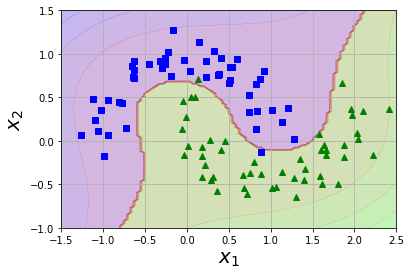

In [22]:
x0s = np.linspace(-1.5,2.5,100)
x1s = np.linspace(-1.,1.5,100)
x0,x1 = np.meshgrid(x0s,x1s)
X_new = np.c_[x0.ravel(),x1.ravel()]
y_pred = poly_kernel_svm_clf1.predict(X_new).reshape(x0.shape)
y_decision = poly_kernel_svm_clf1.decision_function(X_new).reshape(x0.shape)
plt.contourf(x0,x1,y_pred,cmap=plt.cm.brg,alpha=0.2)
plt.contourf(x0,x1,y_decision,cmap=plt.cm.brg,alpha=0.1)

plt.plot(X[:,0][y==0],X[:,1][y==0],"bs")
plt.plot(X[:,0][y==1],X[:,1][y==1],"g^")
plt.axis([-1.5,2.5,-1,1.5])
plt.grid()
plt.xlabel(r"$x_1$",fontsize=20)
plt.ylabel(r"$x_2$",fontsize=20)

Text(0, 0.5, '$x_2$')

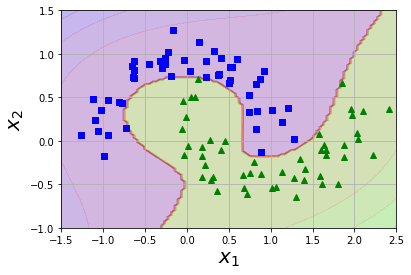

In [23]:
x0s = np.linspace(-1.5,2.5,100)
x1s = np.linspace(-1.,1.5,100)
x0,x1 = np.meshgrid(x0s,x1s)
X_new = np.c_[x0.ravel(),x1.ravel()]
y_pred = poly_kernel_svm_clf2.predict(X_new).reshape(x0.shape)
y_decision = poly_kernel_svm_clf2.decision_function(X_new).reshape(x0.shape)
plt.contourf(x0,x1,y_pred,cmap=plt.cm.brg,alpha=0.2)
plt.contourf(x0,x1,y_decision,cmap=plt.cm.brg,alpha=0.1)

plt.plot(X[:,0][y==0],X[:,1][y==0],"bs")
plt.plot(X[:,0][y==1],X[:,1][y==1],"g^")
plt.axis([-1.5,2.5,-1,1.5])
plt.grid()
plt.xlabel(r"$x_1$",fontsize=20)
plt.ylabel(r"$x_2$",fontsize=20)

Finding the right hyperparamters can be done using a Grid Search (See chapter 2).
In this case C still is related to the learning rate, degree is for the polynomial and coef0 controls how much the model is influenced by high-degree polynomials versus low-degree polynomials

In [24]:
(np.sqrt(3)*2+1)**2/16

1.2455127018922192

## Adding similarity features

In [21]:
def gausRBF(X,gamma,l):
    #X=np.asarray(X)
    ##l=l*np.ones(len(X))
    #return np.exp(-gamma*(X-l)**2)
    return np.exp(-gamma * np.linalg.norm(X - l, axis=1)**2)


In [22]:
X1D = np.linspace(-4, 4, 9).reshape(-1, 1)
Xk = np.c_[gausRBF(X1D, -2,0.3), gausRBF(X1D, 1, 0.3)]
yk=np.array([0,0,1,1,1,1,1,0,0])
x=np.linspace(-5,5,100).reshape(-1, 1)
g1 = gausRBF(x,0.3,-2)
g2 = gausRBF(x,0.3,1)

(-5, 5)

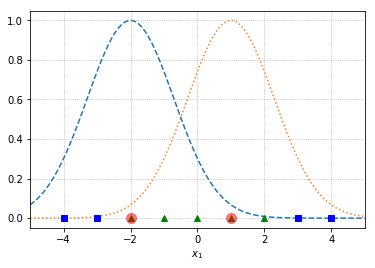

In [23]:
plot(x,g1,ls='--')
plot(x,g2,ls=':')
plot(X1D[:, 0][yk==0],np.zeros(4),"bs")
plot(X1D[:, 0][yk==1],np.zeros(5),"g^")
plot(-2,0,'ro',markersize=10,alpha=0.5)
plot(1,0,'ro',markersize=10,alpha=0.5)
grid(ls=":")
xlabel(r'$x_1$')
xlim(-5,5)

In [24]:
#x2=gausRBF([-1],0.3,1)
#x3=gausRBF([2],0.3,1)

In [25]:
x2= gausRBF(X,0.3,1)
x3= gausRBF(X,0.3,-2)

In [26]:
def gaussian_rbf(x, landmark, gamma):
    return np.exp(-gamma * np.linalg.norm(x - landmark, axis=1)**2)

gamma = 0.3

x1s = np.linspace(-4.5, 4.5, 200).reshape(-1, 1)
x2s = gaussian_rbf(x1s, -2, gamma)
x3s = gaussian_rbf(x1s, 1, gamma)

In [27]:
XK = np.c_[gaussian_rbf(X1D, -2, gamma), gaussian_rbf(X1D, 1, gamma)]
yk = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

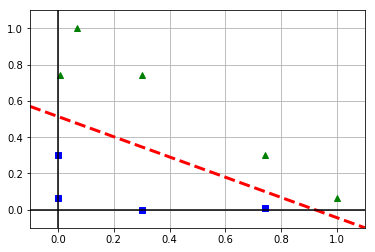

In [28]:
plot(XK[:, 0][yk==0], XK[:, 1][yk==0], "bs")
plot(XK[:, 0][yk==1], XK[:, 1][yk==1], "g^")
plot([-0.1, 1.1], [0.57, -0.1], "r--", linewidth=3) #simple linear classification, nothing involved, just by eye
axis([-0.1, 1.1, -0.1, 1.1])
axhline(y=0, color='k')
axvline(x=0, color='k')
grid()

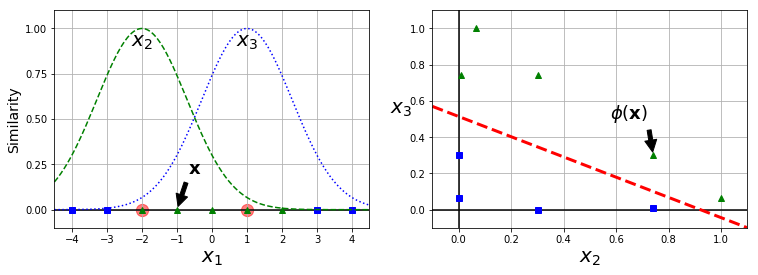

In [29]:
plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.scatter(x=[-2, 1], y=[0, 0], s=150, alpha=0.5, c="red")
plt.plot(X1D[:, 0][yk==0], np.zeros(4), "bs")
plt.plot(X1D[:, 0][yk==1], np.zeros(5), "g^")
plt.plot(x1s, x2s, "g--")
plt.plot(x1s, x3s, "b:")
plt.gca().get_yaxis().set_ticks([0, 0.25, 0.5, 0.75, 1])
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"Similarity", fontsize=14)
plt.annotate(r'$\mathbf{x}$',
             xy=(X1D[3, 0], 0),
             xytext=(-0.5, 0.20),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=18,
            )
plt.text(-2, 0.9, "$x_2$", ha="center", fontsize=20)
plt.text(1, 0.9, "$x_3$", ha="center", fontsize=20)
plt.axis([-4.5, 4.5, -0.1, 1.1])

plt.subplot(122)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(XK[:, 0][yk==0], XK[:, 1][yk==0], "bs")
plt.plot(XK[:, 0][yk==1], XK[:, 1][yk==1], "g^")
plt.xlabel(r"$x_2$", fontsize=20)
plt.ylabel(r"$x_3$  ", fontsize=20, rotation=0)
plt.annotate(r'$\phi\left(\mathbf{x}\right)$',
             xy=(XK[3, 0], XK[3, 1]),
             xytext=(0.65, 0.50),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=18,
            )
plt.plot([-0.1, 1.1], [0.57, -0.1], "r--", linewidth=3)
plt.axis([-0.1, 1.1, -0.1, 1.1])
    
plt.subplots_adjust(right=1)

## Gaussian RBF Kernel

In [30]:
rbf_kernel_svm_clf = Pipeline([
    ("scaler",StandardScaler()),
    ("svm_clf",SVC(kernel='rbf',gamma=5,C=0.001))
])

In [31]:
rbf_kernel_svm_clf.fit(X,y)

Pipeline(memory=None,
     steps=[(u'scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), (u'svm_clf', SVC(C=0.001, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=5, kernel=u'rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

Text(0,0.5,u'$x_2$')

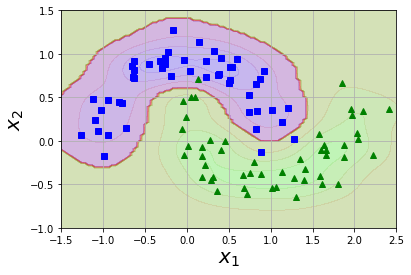

In [32]:
x0s = np.linspace(-1.5,2.5,100)
x1s = np.linspace(-1.,1.5,100)
x0,x1 = np.meshgrid(x0s,x1s)
X_new = np.c_[x0.ravel(),x1.ravel()]
y_pred = rbf_kernel_svm_clf.predict(X_new).reshape(x0.shape)
y_decision = rbf_kernel_svm_clf.decision_function(X_new).reshape(x0.shape)
plt.contourf(x0,x1,y_pred,cmap=plt.cm.brg,alpha=0.2)
plt.contourf(x0,x1,y_decision,cmap=plt.cm.brg,alpha=0.1)

plt.plot(X[:,0][y==0],X[:,1][y==0],"bs")
plt.plot(X[:,0][y==1],X[:,1][y==1],"g^")
plt.axis([-1.5,2.5,-1,1.5])
plt.grid()
plt.xlabel(r"$x_1$",fontsize=20)
plt.ylabel(r"$x_2$",fontsize=20)

Text(0,0.5,u'$x_2$')

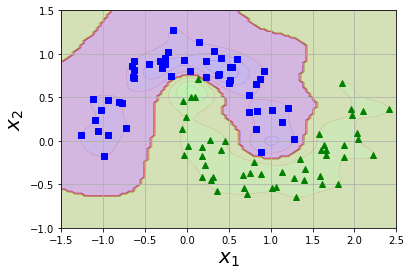

In [33]:
rbf_kernel_svm_clf = Pipeline([
    ("scaler",StandardScaler()),
    ("svm_clf",SVC(kernel='rbf',gamma=5,C=1000))
])
rbf_kernel_svm_clf.fit(X,y)
x0s = np.linspace(-1.5,2.5,100)
x1s = np.linspace(-1.,1.5,100)
x0,x1 = np.meshgrid(x0s,x1s)
X_new = np.c_[x0.ravel(),x1.ravel()]
y_pred = rbf_kernel_svm_clf.predict(X_new).reshape(x0.shape)
y_decision = rbf_kernel_svm_clf.decision_function(X_new).reshape(x0.shape)
plt.contourf(x0,x1,y_pred,cmap=plt.cm.brg,alpha=0.2)
plt.contourf(x0,x1,y_decision,cmap=plt.cm.brg,alpha=0.1)

plt.plot(X[:,0][y==0],X[:,1][y==0],"bs")
plt.plot(X[:,0][y==1],X[:,1][y==1],"g^")
plt.axis([-1.5,2.5,-1,1.5])
plt.grid()
plt.xlabel(r"$x_1$",fontsize=20)
plt.ylabel(r"$x_2$",fontsize=20)

In [34]:
x0,x1 = np.meshgrid(x0s,x1s)
x0

array([[-1.5       , -1.45959596, -1.41919192, ...,  2.41919192,
         2.45959596,  2.5       ],
       [-1.5       , -1.45959596, -1.41919192, ...,  2.41919192,
         2.45959596,  2.5       ],
       [-1.5       , -1.45959596, -1.41919192, ...,  2.41919192,
         2.45959596,  2.5       ],
       ...,
       [-1.5       , -1.45959596, -1.41919192, ...,  2.41919192,
         2.45959596,  2.5       ],
       [-1.5       , -1.45959596, -1.41919192, ...,  2.41919192,
         2.45959596,  2.5       ],
       [-1.5       , -1.45959596, -1.41919192, ...,  2.41919192,
         2.45959596,  2.5       ]])

In [35]:
x0.ravel()

array([-1.5       , -1.45959596, -1.41919192, ...,  2.41919192,
        2.45959596,  2.5       ])

In [36]:
np.c_[x0.ravel(),x1.ravel()]

array([[-1.5       , -1.        ],
       [-1.45959596, -1.        ],
       [-1.41919192, -1.        ],
       ...,
       [ 2.41919192,  1.5       ],
       [ 2.45959596,  1.5       ],
       [ 2.5       ,  1.5       ]])

In [37]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)
    
def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

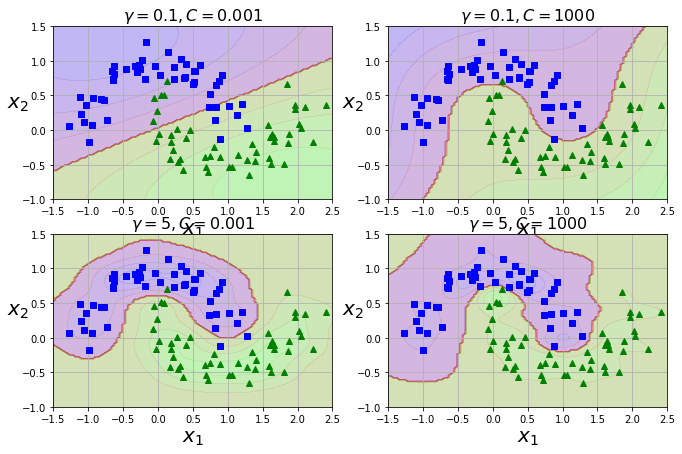

In [38]:
from sklearn.svm import SVC

gamma1, gamma2 = 0.1, 5
C1, C2 = 0.001, 1000
hyperparams = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2) #tuples

svm_clfs = []
for gamma, C in hyperparams:
    rbf_kernel_svm_clf = Pipeline([
            ("scaler", StandardScaler()),
            ("svm_clf", SVC(kernel="rbf", gamma=gamma, C=C))
        ])
    rbf_kernel_svm_clf.fit(X, y)
    svm_clfs.append(rbf_kernel_svm_clf)

plt.figure(figsize=(11, 7))

for i, svm_clf in enumerate(svm_clfs):
    plt.subplot(221 + i)
    plot_predictions(svm_clf, [-1.5, 2.5, -1, 1.5])
    plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
    gamma, C = hyperparams[i]
    plt.title(r"$\gamma = {}, C = {}$".format(gamma, C), fontsize=16)

# Regression

In [39]:
#Create linear data
np.random.seed(42)
m = 50
X = 2 * np.random.rand(m,1) # Create random x variables
y = (4 + 3*X + 4*np.random.rand(m,1)).ravel() # Create data as a linear function and add randomness

In [40]:
np.random.rand(m) # Creates an array of m elements
np.random.rand(m,1) # creates an array of arrays of m rows and 1 column
np.random.rand(m,1).ravel() # Same as the first version. 
#Useful for when you have a matrix and you wanna add rows and then get just one list

array([0.64203165, 0.08413996, 0.16162871, 0.89855419, 0.60642906,
       0.00919705, 0.10147154, 0.66350177, 0.00506158, 0.16080805,
       0.54873379, 0.6918952 , 0.65196126, 0.22426931, 0.71217922,
       0.23724909, 0.3253997 , 0.74649141, 0.6496329 , 0.84922341,
       0.65761289, 0.5683086 , 0.09367477, 0.3677158 , 0.26520237,
       0.24398964, 0.97301055, 0.39309772, 0.89204656, 0.63113863,
       0.7948113 , 0.50263709, 0.57690388, 0.49251769, 0.19524299,
       0.72245212, 0.28077236, 0.02431597, 0.6454723 , 0.17711068,
       0.94045858, 0.95392858, 0.91486439, 0.3701587 , 0.01545662,
       0.92831856, 0.42818415, 0.96665482, 0.96361998, 0.85300946])

In [41]:
# Using SVM to do linear regression. This will fit the previous data to the best line. 
# Trying different epsilon (e.g width of the region to fit as many instances as possible.)
from sklearn.svm import LinearSVR
svm_reg1 = LinearSVR(epsilon=1.5,random_state=42)
svm_reg1.fit(X,y)
svm_reg2 = LinearSVR(epsilon=0.5,random_state=42)
svm_reg2.fit(X,y)

LinearSVR(C=1.0, dual=True, epsilon=0.5, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=42, tol=0.0001, verbose=0)

In [42]:
def find_support_vectors(svm_reg, X, y):
    y_pred = svm_reg.predict(X)
    off_margin = (np.abs(y - y_pred) >= svm_reg.epsilon)
    return np.argwhere(off_margin)

svm_reg1.support_ = find_support_vectors(svm_reg1, X, y)
svm_reg2.support_ = find_support_vectors(svm_reg2, X, y)

eps_x1 = 1
eps_y_pred = svm_reg1.predict([[eps_x1]])

Text(0.5,1,u'$\\epsilon = 0.5$')

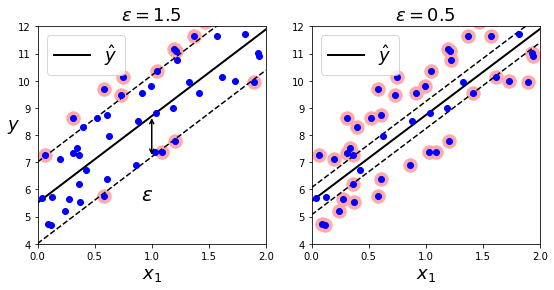

In [43]:
def plot_svm_regression(svm_reg, X, y, axes):
    x1s = np.linspace(axes[0], axes[1], 100).reshape(100, 1)
    y_pred = svm_reg.predict(x1s)
    plt.plot(x1s, y_pred, "k-", linewidth=2, label=r"$\hat{y}$")
    plt.plot(x1s, y_pred + svm_reg.epsilon, "k--")
    plt.plot(x1s, y_pred - svm_reg.epsilon, "k--")
    plt.scatter(X[svm_reg.support_], y[svm_reg.support_], s=180, facecolors='#FFAAAA')
    plt.plot(X, y, "bo")
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.legend(loc="upper left", fontsize=18)
    plt.axis(axes)

plt.figure(figsize=(9, 4))
plt.subplot(121)
plot_svm_regression(svm_reg1, X, y, [0, 2, 4, 12])
plt.title(r"$\epsilon = {}$".format(svm_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
#plt.plot([eps_x1, eps_x1], [eps_y_pred, eps_y_pred - svm_reg1.epsilon], "k-", linewidth=2)
plt.annotate(
        '', xy=(eps_x1, eps_y_pred), xycoords='data',
        xytext=(eps_x1, eps_y_pred - svm_reg1.epsilon),
        textcoords='data', arrowprops={'arrowstyle': '<->', 'linewidth': 1.5}
    )
plt.text(0.91, 5.6, r"$\epsilon$", fontsize=20)
plt.subplot(122)
plot_svm_regression(svm_reg2, X, y, [0, 2, 4, 12])
plt.title(r"$\epsilon = {}$".format(svm_reg2.epsilon), fontsize=18)

In [44]:
#Trying now a polynomial example
np.random.seed(42)
m = 100
X = 2 * np.random.rand(m, 1) - 1
y = (0.2 + 0.1 * X + 0.5 * X**2 + np.random.randn(m, 1)/10).ravel()

In [45]:
from sklearn.svm import SVR
svm_poly_reg = SVR(kernel="poly", degree=2,C=100,epsilon=0.1,gamma='scale')
svm_poly_reg.fit(X,y)

SVR(C=100, cache_size=200, coef0=0.0, degree=2, epsilon=0.1, gamma=u'scale',
  kernel=u'poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [46]:
svm_poly_reg1 = SVR(kernel="poly", degree=2, C=100, epsilon=0.1, gamma="scale")
svm_poly_reg2 = SVR(kernel="poly", degree=2, C=0.01, epsilon=0.1, gamma="scale")
svm_poly_reg1.fit(X, y)
svm_poly_reg2.fit(X, y)

SVR(C=0.01, cache_size=200, coef0=0.0, degree=2, epsilon=0.1, gamma=u'scale',
  kernel=u'poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

Text(0.5,1,u'$degree=2, C=0.01, \\epsilon = 0.1$')

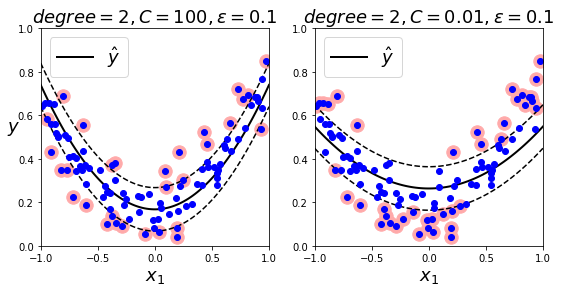

In [47]:
plt.figure(figsize=(9, 4))
plt.subplot(121)
plot_svm_regression(svm_poly_reg1, X, y, [-1, 1, 0, 1])
plt.title(r"$degree={}, C={}, \epsilon = {}$".format(svm_poly_reg1.degree, svm_poly_reg1.C, svm_poly_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
plt.subplot(122)
plot_svm_regression(svm_poly_reg2, X, y, [-1, 1, 0, 1])
plt.title(r"$degree={}, C={}, \epsilon = {}$".format(svm_poly_reg2.degree, svm_poly_reg2.C, svm_poly_reg2.epsilon), fontsize=18)

# Making predictions with SVM

Using the iris dataset to train an SVM and then do predictions for flowers

In [48]:
# Getting the data
iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.float64)  # Iris-Virginica

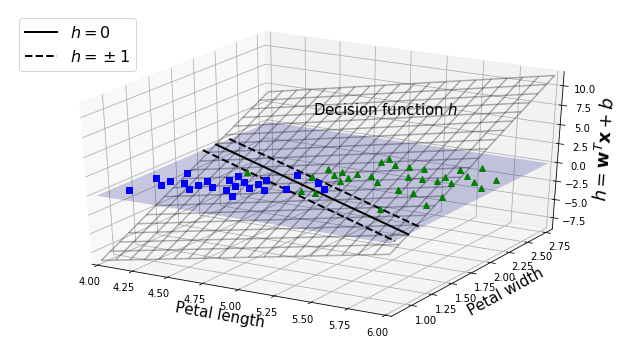

In [49]:
from mpl_toolkits.mplot3d import Axes3D

def plot_3D_decision_function(ax, w, b, x1_lim=[4, 6], x2_lim=[0.8, 2.8]):
    x1_in_bounds = (X[:, 0] > x1_lim[0]) & (X[:, 0] < x1_lim[1])
    X_crop = X[x1_in_bounds]
    y_crop = y[x1_in_bounds]
    x1s = np.linspace(x1_lim[0], x1_lim[1], 20)
    x2s = np.linspace(x2_lim[0], x2_lim[1], 20)
    x1, x2 = np.meshgrid(x1s, x2s)
    xs = np.c_[x1.ravel(), x2.ravel()]
    df = (xs.dot(w) + b).reshape(x1.shape)
    m = 1 / np.linalg.norm(w)
    boundary_x2s = -x1s*(w[0]/w[1])-b/w[1]
    margin_x2s_1 = -x1s*(w[0]/w[1])-(b-1)/w[1]
    margin_x2s_2 = -x1s*(w[0]/w[1])-(b+1)/w[1]
    ax.plot_surface(x1s, x2, np.zeros_like(x1),
                    color="b", alpha=0.2, cstride=100, rstride=100)
    ax.plot(x1s, boundary_x2s, 0, "k-", linewidth=2, label=r"$h=0$")
    ax.plot(x1s, margin_x2s_1, 0, "k--", linewidth=2, label=r"$h=\pm 1$")
    ax.plot(x1s, margin_x2s_2, 0, "k--", linewidth=2)
    ax.plot(X_crop[:, 0][y_crop==1], X_crop[:, 1][y_crop==1], 0, "g^")
    ax.plot_wireframe(x1, x2, df, alpha=0.3, color="k")
    ax.plot(X_crop[:, 0][y_crop==0], X_crop[:, 1][y_crop==0], 0, "bs")
    ax.axis(x1_lim + x2_lim)
    ax.text(4.5, 2.5, 3.8, "Decision function $h$", fontsize=15)
    ax.set_xlabel(r"Petal length", fontsize=15)
    ax.set_ylabel(r"Petal width", fontsize=15)
    ax.set_zlabel(r"$h = \mathbf{w}^T \mathbf{x} + b$", fontsize=18)
    ax.legend(loc="upper left", fontsize=16)

# svm_clf2 was trained before
fig = plt.figure(figsize=(11, 6))
ax1 = fig.add_subplot(111, projection='3d')
plot_3D_decision_function(ax1, w=svm_clf2.coef_[0], b=svm_clf2.intercept_[0])

# Exercises 8-10

In [50]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

In [51]:
from sklearn.linear_model import SGDClassifier

C=5
alpha = 1 / (C * len(X))

linsvc_cl = LinearSVC(C=C,loss='hinge',random_state=42)
svc_cl = SVC(gamma='auto',C=C,kernel='linear')
sgd_cl = SGDClassifier(random_state=42,loss='hinge',learning_rate='constant',alpha=alpha,max_iter=100000,eta0=0.001,tol=-np.infty)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [52]:
linsvc_cl.fit(X_scaled,y)
svc_cl.fit(X_scaled,y)
sgd_cl.fit(X_scaled,y)

SGDClassifier(alpha=0.002, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.001, fit_intercept=True,
       l1_ratio=0.15, learning_rate=u'constant', loss=u'hinge',
       max_iter=100000, n_iter=None, n_iter_no_change=5, n_jobs=None,
       penalty='l2', power_t=0.5, random_state=42, shuffle=True, tol=-inf,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [53]:
print("LinearSVC:                   ", linsvc_cl.intercept_, linsvc_cl.coef_)
print("SVC:                         ", svc_cl.intercept_, svc_cl.coef_)
print("SGDClassifier(alpha={:.5f}):".format(sgd_cl.alpha), sgd_cl.intercept_, sgd_cl.coef_)

LinearSVC:                    [0.28474532] [[1.05364923 1.09903601]]
SVC:                          [0.31896852] [[1.1203284  1.02625193]]
SGDClassifier(alpha=0.00200): [0.319] [[1.12072936 1.02666842]]


In [54]:
print("LinearSVC:                   ", linsvc_cl.intercept_, linsvc_cl.coef_)
print("SVC:                         ", svc_cl.intercept_, svc_cl.coef_)
print("SGDClassifier(alpha={:.5f}):".format(sgd_cl.alpha), sgd_cl.intercept_, sgd_cl.coef_)

LinearSVC:                    [0.28474532] [[1.05364923 1.09903601]]
SVC:                          [0.31896852] [[1.1203284  1.02625193]]
SGDClassifier(alpha=0.00200): [0.319] [[1.12072936 1.02666842]]


In [55]:
w1 = -linsvc_cl.coef_[0, 0]/linsvc_cl.coef_[0, 1]
b1 = -linsvc_cl.intercept_[0]/linsvc_cl.coef_[0, 1]
w2 = -svc_cl.coef_[0, 0]/svc_cl.coef_[0, 1]
b2 = -svc_cl.intercept_[0]/svc_cl.coef_[0, 1]
w3 = -sgd_cl.coef_[0, 0]/sgd_cl.coef_[0, 1]
b3 = -sgd_cl.intercept_[0]/sgd_cl.coef_[0, 1]

In [56]:
# Transform the decision boundary lines back to the original scale
line1 = scaler.inverse_transform([[-10, -10 * w1 + b1], [10, 10 * w1 + b1]])
line2 = scaler.inverse_transform([[-10, -10 * w2 + b2], [10, 10 * w2 + b2]])
line3 = scaler.inverse_transform([[-10, -10 * w3 + b3], [10, 10 * w3 + b3]])

[0, 5.5, 0, 2.0]

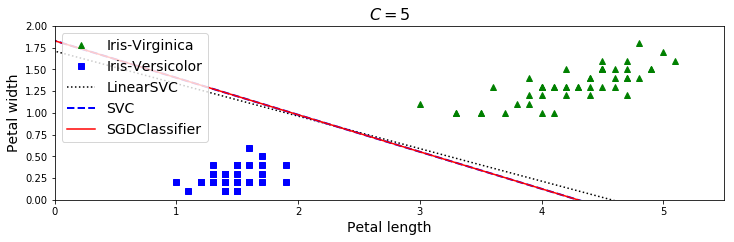

In [57]:
plt.figure(figsize=(12,3.2))
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^", label="Iris-Virginica")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs", label="Iris-Versicolor")
plt.plot(line1[:, 0], line1[:, 1], "k:", label="LinearSVC")
plt.plot(line2[:, 0], line2[:, 1], "b--", linewidth=2, label="SVC")
plt.plot(line3[:, 0], line3[:, 1], "r-", label="SGDClassifier")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.title("$C = {}$".format(linsvc_cl.C), fontsize=16)
plt.axis([0, 5.5, 0, 2.])

In [58]:
iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

C=5
alpha = 1 / (C * len(X))

linsvc_cl = LinearSVC(C=C,loss='hinge',random_state=42)
svc_cl = SVC(gamma='auto',C=C,kernel='linear')
sgd_cl = SGDClassifier(random_state=42,loss='hinge',learning_rate='constant',alpha=alpha,max_iter=100000,eta0=0.001,tol=-np.infty)

scaler = StandardScaler()


## linear svc
scaled_linearsvc = Pipeline([
        ("scaler", scaler),
        ("linear_svc", linsvc_cl),
    ])

scaled_linearsvc.fit(X,y)
# Convert to unscaled parameters
b1 = linsvc_cl.decision_function([-scaler.mean_ / scaler.scale_])
w1 = linsvc_cl.coef_[0] / scaler.scale_
linsvc_cl.intercept_ = np.array([b1])
linsvc_cl.coef_ = np.array([w1])

## SVC kernel linear
scaled_svc = Pipeline([
        ("scaler",scaler),
        ("svm",svc_cl)
])
scaled_svc.fit(X,y)

w2 = -svc_cl.coef_[0, 0]/svc_cl.coef_[0, 1]
b2 = -svc_cl.intercept_[0]/svc_cl.coef_[0, 1]
line2 = scaler.inverse_transform([[-10, -10 * w2 + b2], [10, 10 * w2 + b2]])
#svc can't change coef_ for some reason.
#svc_cl.intercept_ = np.array([b2])
#svc_cl.coef_ = np.array([w2])
#svc_coef = np.array([w2])

## SGD 
scaled_sgd = Pipeline([
        ("scaler",scaler),
        ("sgd",sgd_cl)
])
scaled_sgd.fit(X,y)
b3 = sgd_cl.decision_function([-scaler.mean_ / scaler.scale_])
w3 = sgd_cl.coef_[0] / scaler.scale_
sgd_cl.intercept_ = np.array([b3])
sgd_cl.coef_ = np.array([w3])


In [59]:
# Find support vectors (LinearSVC does not do this automatically)
t = y * 2 - 1
support_vectors_idx1 = (t * (X.dot(w1) + b1) < 1).ravel()
linsvc_cl.support_vectors_ = X[support_vectors_idx1]
#t = y * 2 - 1
#support_vectors_idx2 = (t * (X.dot(w2) + b2) < 1).ravel()
#svc_cl.support_vectors_ = X[support_vectors_idx2]
support_vectors_idx3 = (t * (X.dot(w3) + b3) < 1).ravel()
sgd_cl.support_vectors_ = X[support_vectors_idx3]

[0, 5.5, 0, 2.0]

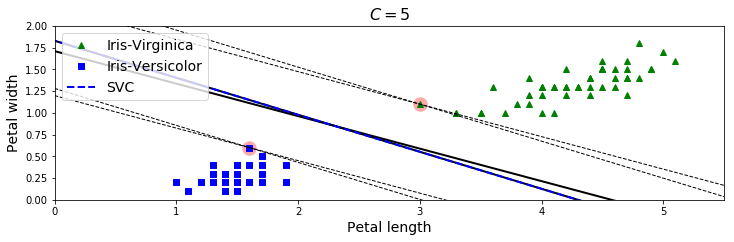

In [60]:
plt.figure(figsize=(12,3.2))
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^", label="Iris-Virginica")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs", label="Iris-Versicolor")
plot_svc_decision_boundary(linsvc_cl, 0, 6)
plot_svc_decision_boundary(sgd_cl, 0, 6)
plt.plot(line2[:, 0], line2[:, 1], "b--", linewidth=2, label="SVC")


plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.title("$C = {}$".format(linsvc_cl.C), fontsize=16)
plt.axis([0, 5.5, 0, 2.])

In [61]:
try:
    from sklearn.datasets import fetch_openml
    mnist = fetch_openml('mnist_784', version=1, cache=True)
except ImportError:
    from sklearn.datasets import fetch_mldata
    mnist = fetch_mldata('MNIST original')

X = mnist["data"]
y = mnist["target"]

X_train = X[:60000]
y_train = y[:60000]
X_test = X[60000:]
y_test = y[60000:]

# Permute order of events. Some datasets are sensitive to that
np.random.seed(42)
rnd_idx = np.random.permutation(60000)
X_train = X_train[rnd_idx]
y_train = y_train[rnd_idx]

In [62]:
# Linear SVC uses directly a one versus all approach
lin_clf = LinearSVC(random_state=42)
lin_clf.fit(X_train,y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=42, tol=0.0001,
     verbose=0)

In [63]:
#Check its accuracy score
from sklearn.metrics import accuracy_score
y_pred = lin_clf.predict(X_train)
print("The accuracy is {:0.2f}".format(accuracy_score(y_train,y_pred)))

The accuracy is 0.86


In [64]:
# What if we scale things

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [65]:
lin_clf2 = LinearSVC(random_state=42)
lin_clf2.fit(X_train_scaled,y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=42, tol=0.0001,
     verbose=0)

In [66]:
y_pred_scaled = lin_clf2.predict(X_train_scaled)
print("The accuracy after scaling is {:0.2f}".format(accuracy_score(y_train,y_pred_scaled)))

The accuracy after scaling is 0.92


In [67]:
# Instead of using a linear SVC lets use another SVM with a different kernel. We will use gaussian or RBF
# we keep using the scaled version
svm_clf = SVC(kernel='rbf',gamma='auto',decision_function_shape='ovr')
svm_clf.fit(X_train_scaled[:10000], y_train[:10000]) #using less data

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=u'ovr', degree=3, gamma=u'auto', kernel=u'rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [68]:
y_pred = svm_clf.predict(X_train_scaled)
print("The accuracy is {:0.2f} using SVC".format(accuracy_score(y_train,y_pred)))

The accuracy is 0.95 using SVC


In [71]:
# Lets optimize the parameters for this SVC Model, we will change C and gamma
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform

parameters = {"gamma": reciprocal(0.001,0.1),"C": uniform(1,10)}
rnd_srch_cv = RandomizedSearchCV(svm_clf,parameters,n_iter=10,verbose=2,cv=3)
rnd_srch_cv.fit(X_train_scaled[:10000], y_train[:10000]) #using less data

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] C=8.852316058423087, gamma=0.001766074650481071 .................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .. C=8.852316058423087, gamma=0.001766074650481071, total=  28.7s
[CV] C=8.852316058423087, gamma=0.001766074650481071 .................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   48.1s remaining:    0.0s


[CV] .. C=8.852316058423087, gamma=0.001766074650481071, total=  27.0s
[CV] C=8.852316058423087, gamma=0.001766074650481071 .................
[CV] .. C=8.852316058423087, gamma=0.001766074650481071, total=  26.6s
[CV] C=1.8271960104746645, gamma=0.006364737055453384 ................
[CV] . C=1.8271960104746645, gamma=0.006364737055453384, total= 1.1min
[CV] C=1.8271960104746645, gamma=0.006364737055453384 ................
[CV] . C=1.8271960104746645, gamma=0.006364737055453384, total= 1.2min
[CV] C=1.8271960104746645, gamma=0.006364737055453384 ................
[CV] . C=1.8271960104746645, gamma=0.006364737055453384, total= 1.3min
[CV] C=9.875199193765326, gamma=0.051349833451870636 .................
[CV] .. C=9.875199193765326, gamma=0.051349833451870636, total= 1.6min
[CV] C=9.875199193765326, gamma=0.051349833451870636 .................
[CV] .. C=9.875199193765326, gamma=0.051349833451870636, total= 1.6min
[CV] C=9.875199193765326, gamma=0.051349833451870636 .................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed: 72.0min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=u'ovr', degree=3, gamma=u'auto', kernel=u'rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=None,
          param_distributions={u'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x11a7498d0>, u'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x11a9ca550>},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [73]:
rnd_srch_cv.best_estimator_

SVC(C=8.852316058423087, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=u'ovr', degree=3, gamma=0.001766074650481071,
  kernel=u'rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [75]:
rnd_srch_cv.best_score_

0.9406

In [76]:
rnd_srch_cv.best_estimator_.fit(X_train_scaled, y_train)

SVC(C=8.852316058423087, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=u'ovr', degree=3, gamma=0.001766074650481071,
  kernel=u'rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [77]:
y_pred = rnd_srch_cv.best_estimator_.predict(X_train_scaled)
accuracy_score(y_train, y_pred)

0.99965

In [79]:
y_pred = rnd_srch_cv.best_estimator_.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.9705

In [81]:
D=reciprocal(0.001, 0.1)

(array([253., 100.,  72.,  48.,  46.,  38.,  34.,  18.,  37.,  30.,  18.,
         19.,  14.,  15.,  12.,  16.,  11.,  11.,  11.,  12.,  13.,  10.,
          5.,   8.,  10.,   4.,   5.,   7.,  10.,   6.,   8.,   5.,   4.,
          6.,   6.,   8.,   6.,  11.,  10.,   2.,   5.,   6.,   4.,   6.,
          5.,   2.,   5.,   4.,   0.,   4.]),
 array([0.00100949, 0.00298768, 0.00496587, 0.00694406, 0.00892224,
        0.01090043, 0.01287862, 0.01485681, 0.01683499, 0.01881318,
        0.02079137, 0.02276956, 0.02474774, 0.02672593, 0.02870412,
        0.03068231, 0.03266049, 0.03463868, 0.03661687, 0.03859506,
        0.04057324, 0.04255143, 0.04452962, 0.04650781, 0.04848599,
        0.05046418, 0.05244237, 0.05442056, 0.05639874, 0.05837693,
        0.06035512, 0.06233331, 0.06431149, 0.06628968, 0.06826787,
        0.07024606, 0.07222424, 0.07420243, 0.07618062, 0.07815881,
        0.08013699, 0.08211518, 0.08409337, 0.08607155, 0.08804974,
        0.09002793, 0.09200612, 0.0939843 , 0.

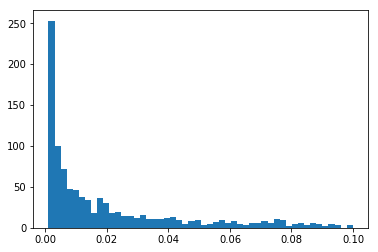

In [89]:
plt.hist(D.rvs(1000),bins=50)

In [90]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
X = housing["data"]
y = housing["target"]

In [93]:
len(X)-len(X)*0.2

16512.0

In [94]:
# TO SPLIT YOU CAN USE THIS
X_train = X[:16512]
y_train = y[:16512]
X_test = X[16512:]
y_test = y[16512:]

In [95]:
len(X_train)

16512

In [96]:
# OR YOU CAN USE TRAIN_TEST_SPLIT TOO
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X_train)

16512

In [97]:
#Scale the instances of the X vector
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) #FIT Data and transform
X_test_scaled = scaler.transform(X_test) # Just tranform since we want to use this to test

In [98]:
lin_svr = LinearSVR(random_state=42)
lin_svr.fit(X_train_scaled,y_train)

LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=42, tol=0.0001, verbose=0)

In [99]:
from sklearn.metrics import mean_squared_error
y_pred = lin_svr.predict(X_train_scaled)
mse = mean_squared_error(y_train,y_pred)
mse

0.954517044073374

In [101]:
np.sqrt(mse)*10000 #unscaled

9769.93881287582

The error is \$9769.93. This is too large

In [102]:
params = {"gamma":reciprocal(0.001,0.1), "C":uniform(1,10)} #hyperparameters to look at
rnd_search_cv = RandomizedSearchCV(SVR(),params,n_iter=10,verbose=2,cv=3,random_state=42)
rnd_search_cv.fit(X_train_scaled,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] C=4.745401188473625, gamma=0.07969454818643928 ..................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ... C=4.745401188473625, gamma=0.07969454818643928, total=   4.9s
[CV] C=4.745401188473625, gamma=0.07969454818643928 ..................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.5s remaining:    0.0s


[CV] ... C=4.745401188473625, gamma=0.07969454818643928, total=   4.7s
[CV] C=4.745401188473625, gamma=0.07969454818643928 ..................
[CV] ... C=4.745401188473625, gamma=0.07969454818643928, total=   4.7s
[CV] C=8.31993941811405, gamma=0.015751320499779724 ..................
[CV] ... C=8.31993941811405, gamma=0.015751320499779724, total=   4.5s
[CV] C=8.31993941811405, gamma=0.015751320499779724 ..................
[CV] ... C=8.31993941811405, gamma=0.015751320499779724, total=   4.1s
[CV] C=8.31993941811405, gamma=0.015751320499779724 ..................
[CV] ... C=8.31993941811405, gamma=0.015751320499779724, total=   4.3s
[CV] C=2.560186404424365, gamma=0.002051110418843397 .................
[CV] .. C=2.560186404424365, gamma=0.002051110418843397, total=   3.9s
[CV] C=2.560186404424365, gamma=0.002051110418843397 .................
[CV] .. C=2.560186404424365, gamma=0.002051110418843397, total=   3.8s
[CV] C=2.560186404424365, gamma=0.002051110418843397 .................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  2.9min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=None,
          param_distributions={u'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x11afd4190>, u'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x11af26c10>},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [103]:
rnd_search_cv.best_estimator_

SVR(C=4.745401188473625, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma=0.07969454818643928, kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [106]:
y_pred =rnd_search_cv.best_estimator_.predict(X_train_scaled)
mse = mean_squared_error(y_train,y_pred)
np.sqrt(mse)

0.5727524770785359

In [107]:
y_pred =rnd_search_cv.best_estimator_.predict(X_test_scaled)
mse = mean_squared_error(y_test,y_pred)
np.sqrt(mse)

0.5929168385528734

Smaller than before, might be able to do better.